# EJERCICIO E04

# Reconocimiento de Patrones
[Curso de Reconocimiento de Patrones](https://https://domingomery.ing.puc.cl/teaching/patrones/)

Departamento de Ciencia de la Computación

Universidad Catolica de Chile

(c) Domingo Mery, http://domingomery.ing.uc.cl



# IMPORTANTE

En este código por favor:

*   No agregar celdas nuevas
*   No agregar librerías nuevas
*   No usar otro nombre de variables
*   No cambiar el clasificador ni el número de vecinos del KNN
*   No hacer gráficas adicionales


<font color='red'>Esta tarea será corregida de manera rápida en base al resultado: resultado correcto o incorrecto.</font>

Si quieres hacer modificaciones y probar estrategias distintas, te invito a hacerlo en otro código (no en éste), ya que <font color='red'>este código debe modificarse sólo en los lugares indicados.</font>


# Ejercicio 04: Detección de Caras usando Características de Textura

En este ejercicio se realizará la clasificación entre dos clases ([ver base de datos](https://www.dropbox.com/sh/tlnx9sy03kexahb/AADm9-Md1Vg1ZfVpwofZZW3Ta)):

* Clase 0: Caras (contiene fotos tomadas de caras frontales y bien alineadas)

* Clase 1: No-caras (contiene fotos de objetos que no son caras, por ejemplo sillas, mesas, plantas, etc.)

La base de datos contiene 240 imágenes de 80x80 pixeles en tonos de gris (120 imágenes por clase).

**ADVERTENCIA:** Este ejercicio tiene fines pedagógicos sólamente con la idea de que la solución a este problema pueda ejecutarse en un par de minutos. Un buen detector de caras sigue esta idea pero con miles de imágenes por clase.

A continuación, en cada PREGUNTA deberás ingresar alguna(s) líneas de código, o completar donde aparezca '<= COMPLETAR AQUI".

<font color='red'>Muchas de estas funciones fueron usadas en el Colab del ejemplo de texturas visto en la clase anterior. Antes de hacer este ejercicio deberías entender bien cómo funciona este ejemplo: </font>[Colab de Texturas](https://drive.google.com/file/d/1Xwr4fcZ4JtaDWVQYSFMW2aqxfV36zCwo/view?usp=sharing)






# Setup inicial

Liberías y funciones necesarias para que funcione el algoritmo.

## Instalación de Balu3

[Balu3](https://github.com/domingomery/balu3) es una librería creada para extraer características. 

In [1]:
#
# EJECUTAR ESTA CELDA SIN MODIFICARLA
#

!git clone https://github.com/domingomery/balu3
!pip install ./balu3

Cloning into 'balu3'...
remote: Enumerating objects: 214, done.
remote: Counting objects: 100% (214/214), done.
remote: Compressing objects: 100% (153/153), done.
remote: Total 214 (delta 128), reused 137 (delta 57), pack-reused 0
Receiving objects: 100% (214/214), 63.32 KiB | 9.04 MiB/s, done.
Resolving deltas: 100% (128/128), done.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Processing ./balu3
  Preparing metadata (setup.py) ... done
  Created wheel for balu3: filename=balu3-1.0-py3-none-any.whl size=42780 sha256=02aa07e61b82c89070993c57ef5a17c29a17bbd6b4ba5b570c028bcd2e8b0b5a
  Stored in directory: /tmp/pip-ephem-wheel-cache-vrdu3fl6/wheels/16/25/1e/631c042e986997d66481af1f42bd9a1f0937c379ca8d6f32fb
Successfully built balu3


## Setup de librerías



In [2]:
#
# EJECUTAR ESTA CELDA SIN MODIFICARLA
#

import numpy             as     np
import matplotlib.pyplot as     plt
from   sklearn.metrics   import confusion_matrix, accuracy_score
from   sklearn.neighbors import KNeighborsClassifier
from   seaborn           import heatmap
from   tqdm.auto         import tqdm
from   balu3.fx.chr      import lbp, haralick, gabor
from   balu3.ft.norm     import minmax
from   balu3.io.misc     import imageload

print('Librerías cargadas.')


Librerías cargadas.


## Funciones necesarias

In [3]:
#
# EJECUTAR ESTA CELDA SIN MODIFICARLA
#

# Separación entre training y testing
def SplitTrainTest(X,y,n):

  K      = np.max(y)+1              # número de clases
  N      = int(X.shape[0]/K)        # numeros de muestras por clase
  Ntrain = n*K                      # número de muestras para el training
  Ntest  = K*N-Ntrain               # número de muestras para el testing
  M      = X.shape[1]               # número de características por muestra
  Xtrain = np.zeros((Ntrain,M))     # subset de training
  ytrain = np.zeros((Ntrain),'int') # ground truth del training         
  Xtest  = np.zeros((Ntest,M))      # subset de testing
  ytest  = np.zeros((Ntest),'int')  # ground truth del testing  

  # contadores
  itrain = 0
  itest  = 0
  t      = 0

  for j in range(K):     # para cada clase
    for i in range(N):   # para cada imagen de la clase
      if i<n: # training
        Xtrain[itrain,:] = X[t,:]
        ytrain[itrain] = y[t]
        itrain = itrain+1
      else:  # testing
        Xtest[itest,:] = X[t,:]
        ytest[itest] = y[t]
        itest = itest+1
      t = t+1
  
  return Xtrain,ytrain,Xtest,ytest

# Clasificación usando KNN con 3 vecinos
def ClassifierKNN(Xtrain,ytrain,Xtest,ytest):
  # Normalizacion MinMax
  Xtrain, a, b = minmax(Xtrain)
  Xtest        = Xtest * a + b

  # Training
  knn = KNeighborsClassifier(n_neighbors=3)
  knn.fit(Xtrain, ytrain)

  # Testing
  ypred        = knn.predict(Xtest)

  # Evaluacion desempeño
  acc          = accuracy_score(ytest,ypred)
  print('Entrenando con '+str(Xtrain.shape[0])+' muestras y probando con '+str(Xtest.shape[0])+' muestras')
  print('Testing Accuracy = '+str(acc*100)+'%')
  C = confusion_matrix(ytest,ypred)
  print('Matriz de Confusión:')
  print(C)
  return acc,C

# PREGUNTA 01: Carga de base de datos (1 punto)

La base de datos consiste en 2 clases y 120 imágenes por clase. Se almacenan en la carpeta `facedetection` con el formato `face_xx_nnn.png`, donde `xx` es el número de la clase (01 para caras, 02 para no caras -en formato de dos dígitos-) y `nnn` es el número de la imagen de la clase (001, 002, ... 120 -en formato de tres dígitos-). Las fotos son de 80x80 pixeles.

Para cargar la base de datos realice los siguientes pasos:

* Descargue la base de datos comprimida que está en: `https://www.dropbox.com/s/9hrkdtswct2s8fe/facedetection.zip`

* Descomprima el archivo descargado

In [4]:
# Carga de base de datos
!wget https://www.dropbox.com/s/9hrkdtswct2s8fe/facedetection.zip
!unzip -qq facedetection.zip

print('Base de datos cargada.')

--2023-04-04 16:22:46--  https://www.dropbox.com/s/9hrkdtswct2s8fe/facedetection.zip
Resolving www.dropbox.com (www.dropbox.com)... 162.125.6.18, 2620:100:601c:18::a27d:612
Connecting to www.dropbox.com (www.dropbox.com)|162.125.6.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/raw/9hrkdtswct2s8fe/facedetection.zip [following]
--2023-04-04 16:22:47--  https://www.dropbox.com/s/raw/9hrkdtswct2s8fe/facedetection.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc9b735fd65fa8ab9903c011a4f8.dl.dropboxusercontent.com/cd/0/inline/B5jtlzNFlRF5YzIFQmgSHG5kiAgyrswljVrt6LSUutwm_f7BzEe4TwL3Yehy9YLCZIF-P_5XITtrN7meAjnwMvTTupfOhlEwbXaBl1Z2iH5T1ViDkwL3IYcvw1X6CvmVxA_mMNNYZnS3aB-6nnR9QnMbadzXdQF7uEKmWufPP0iCKA/file# [following]
--2023-04-04 16:22:47--  https://uc9b735fd65fa8ab9903c011a4f8.dl.dropboxusercontent.com/cd/0/inline/B5jtlzNFlRF5YzIFQmgSHG5kiAgyrswljVrt6LSUutwm_f7BzEe4TwL3Yehy9YLCZ

# PREGUNTA 2: Lectura y despliegue de una imagen (2 puntos)

Usando la función `imageload` lea y despliegue la imagen `face_01_015.png' (imagen 15 de la clase 1).

Para usar la función `imageload` use la siguiente sintaxis:

`img = 255*imageload(imprefix,clase,dig_clase,num_img,dig_img,echo='on')` donde:

* `imprefix  = fpath + '/' + prefix`

* `fpath` : nombre del directorio de la base de datos

* `prefix` : prefijo del nombre del archivo de la imagen

* `clase`   : número de la clase

* `dig_clase` : número de dígitos por clase

* `num_img` : número de la imagen

* `dig_img` : número de dígitos por número de imagen

A manera de ejemplo si se quiere leer la imagen "textura/D007_05.png" se debe usar el siguiente código:

`fpath = 'textura'`

`prefix = 'D'`

`imprefix  = fpath + '/' + prefix`

`img = 255*imageload(imprefix,7,3,5,2,echo='on') # 007 tiene 3 dígitos, 05 tiene 2.`


loading image facedetection/face_01_015.png...


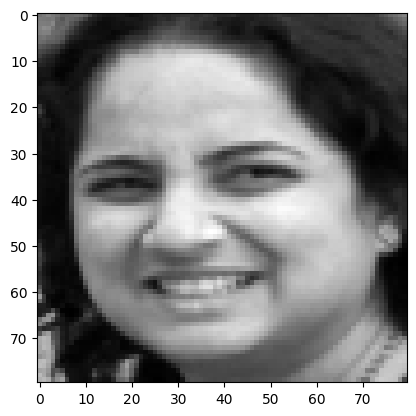

In [5]:
# Las imágenes están en "facedetection/face_xx_nnn.png", donde xxx es el número de la
# clase (01 o bien 02 en dos dígitos por clase) y nnn es el número de la imagen
# (001, 002, ... 120 en tres dígitos por número de imagen)
clase     =      1
dig_clase =      2
num_img   =      15
dig_img   =      3
fpath      =     'facedetection'
prefix     =     'face_'
imprefix  = fpath + '/' + prefix

imagen = 255*imageload(imprefix,clase,dig_clase,num_img,dig_img,echo='on')

plt.imshow(imagen, cmap="gray")
plt.show()


# PREGUNTA 3: Extracción de características (7 puntos)

En esta pregunta se debe realizar la extracción de características de la imagen `img`. Las características a extraer son las basadas en LBP, Haralick y Gabor y se extraen usando los siguientes comandos de la librería Balu3:

## 1) Cómo extraer características LBP clásico:

Con el comando

`f  = def lbp(img,hdiv=a, vdiv=b, mapping='nri_uniform')`

se divide la imagen `img` en `a x b` particiones y en cada una de ellas se extrae el descriptor LBP (vector de 59 elementos). En este caso `f` es un vector de `59*a*b` elementos. En este ejercicio trabajaremos con `a = b = 1`, es decir sólo una partición por imagen.

## 2) Cómo extraer características de Haralick:

Con el comando

`f = def haralick(img,distance=d,)`

se extrae el vector Haralick para una distancia de `d` pixeles. En este caso `f` es un vector de 24 elementos (independiente de la distancia `d`). En este ejercicio trabajaremos con `d = 3`.


## 3) Cómo extraer características de Gabor:

Con el comando
`f = gabor(img,rotations=r, dilations=s)`

se extrae el vector Gabor para `r` rotaciones y `s` escalas. En este caso `f` es un vector de `r*s+3` elementos. En este ejercicio trabajaremos con `r = s = 8`.

In [6]:
K    =    2
N    =    120
Mlbp =    59
Mhar =    24
Mgab =    8 * 8 + 3

Xlbp  = np.zeros((K*N,Mlbp))    # K*N muestras (filas), y Mlbp características (columnas)
Xhar  = np.zeros((K*N,Mhar))    # K*N muestras (filas), y Mhar características (columnas)
Xgab  = np.zeros((K*N,Mgab))    # K*N muestras (filas), y Mgab características (columnas)

y     = np.zeros((K*N),'int')   # ground truth (clasificacion ideal)

t = 0

print('Cargando imagenes y extrayendo características...')
for j in range(K):            # para cada clase
  print('Extrayendo características: batch '+str(j+1)+'/'+str(K))
  for i in tqdm(range(N)):                # para cada imagen de la clase
    # Lectura de la imagen
    clase     = j+1
    num_img   = i+1
    img       = 255*imageload(imprefix,clase,dig_clase,num_img,dig_img,echo='on')

    # Extracción de características

    # LBP clásico de 1x1 particiones
    Xlbp[t,:] = lbp(img,hdiv=1, vdiv=1, mapping='nri_uniform')

    # Haralick con d = 3 pixeles
    Xhar[t,:] = haralick(img,distance=3)

    # Gabor con 8 rotaciones y 8 escalas
    Xgab[t,:] = gabor(img,rotations=8, dilations=8)


    y[t] = j # la muestra t pertenece a la clase j
    t = t+1

Cargando imagenes y extrayendo características...
Extrayendo características: batch 1/2


  0%|          | 0/120 [00:00<?, ?it/s]

loading image facedetection/face_01_001.png...
loading image facedetection/face_01_002.png...
loading image facedetection/face_01_003.png...
loading image facedetection/face_01_004.png...
loading image facedetection/face_01_005.png...
loading image facedetection/face_01_006.png...
loading image facedetection/face_01_007.png...
loading image facedetection/face_01_008.png...
loading image facedetection/face_01_009.png...
loading image facedetection/face_01_010.png...
loading image facedetection/face_01_011.png...
loading image facedetection/face_01_012.png...
loading image facedetection/face_01_013.png...
loading image facedetection/face_01_014.png...
loading image facedetection/face_01_015.png...
loading image facedetection/face_01_016.png...
loading image facedetection/face_01_017.png...
loading image facedetection/face_01_018.png...
loading image facedetection/face_01_019.png...
loading image facedetection/face_01_020.png...
loading image facedetection/face_01_021.png...
loading image

  0%|          | 0/120 [00:00<?, ?it/s]

loading image facedetection/face_02_001.png...
loading image facedetection/face_02_002.png...
loading image facedetection/face_02_003.png...
loading image facedetection/face_02_004.png...
loading image facedetection/face_02_005.png...
loading image facedetection/face_02_006.png...
loading image facedetection/face_02_007.png...
loading image facedetection/face_02_008.png...
loading image facedetection/face_02_009.png...
loading image facedetection/face_02_010.png...
loading image facedetection/face_02_011.png...
loading image facedetection/face_02_012.png...
loading image facedetection/face_02_013.png...
loading image facedetection/face_02_014.png...
loading image facedetection/face_02_015.png...
loading image facedetection/face_02_016.png...
loading image facedetection/face_02_017.png...
loading image facedetection/face_02_018.png...
loading image facedetection/face_02_019.png...
loading image facedetection/face_02_020.png...
loading image facedetection/face_02_021.png...
loading image

# PREGUNTA 4: Clasificación usando LBP (2 puntos)

En la pregunta anterior, fueron extraídas las características LBP, Haralick y Gabor para todas las imágenes de la base de datos. No olvidar que son 120 imágenes por clase, y que son 2 clases. 

A continuación haremos como ejemplo un clasificador de vecinos más cercanos. 

<font color='red'>**IMPORTANTE:** En todo el Ejercicio, el clasificador SIEMPRE 

* será entrenado con un **KNN de 3 vecinos**,

* para el **TRAINING** se usarán las primeras **100 muestras** de cada clase,

* para el **TESTING** se usarán las **20 muestras** restantes de cada clase.


Los pasos a seguir para este ejercicio son los siguientes tres:

## Primer paso: Cargar datos 

En este paso, cargamos en la matriz `X` las características extrídas que van a ser usadas por el clasificador. En nuestro primer ejemplo serían las caractererísticas LBP, es decir:

`X = Xlbp`

(el vector `y`, que contiene la clase a la que pertenece cada clase, es el mismo para LBP, Haralick y Gabor, así es que ya está definido en la pregunta anterior)

## Segundo paso: Separar Training/Testing

En este paso, separamos el conjunto de datos en training y testing usando el comando:

`Xtrain,ytrain,Xtest,ytest = SplitTrainTest(X,y,ntrain)`

donde `ntrain` es el número de muestras por clase a usar en el conjunto de training. 

A manera de ejemplo, si `X` tiene 60x8 elementos (es decir 60 muestras con 8 características por muestra) y tiene dos clases (es decir las primeras 30 filas son de la primera clase y las restantes 30 de la segunda clase) entonces el comando:

`Xtrain,ytrain,Xtest,ytest = SplitTrainTest(X,y,25)`

genera la siguiente salida:

* `Xtrain` matriz de 50x8 elementos (las primeras 25 filas de la primera clase, las restante 25 filas de la segunda clase)
* `ytrain` vector de 50 elementos (25 ceros y 25 unos)
* `Xtest`  matriz de 10x8 elementos (las primeras 10 filas de la primera clase, las restante 10 filas de la segunda clase)
* `ytest`  vector de 10 elementos (5 ceros y 5 unos)


## Tercer paso: Clasificar y evaluar desempeño

Para clasificar usaremos el siguiente comando, en el que se entrena un KNN usando `Xtrain,ytrain` y se prueba en `Xtest` de la siguiente manera:

`acc,C = ClassifierKNN(Xtrain,ytrain,Xtest,ytest)`

La clasificación del conjunto de pruebas (que es almacenado internamente en la variable `ypred`) es comparado con `ytest` para calcular el Accuracy (`acc`) y la matriz de confusión (`C`). En este caso la función `ClassifierKNN` realiza un KNN con 3 vecinos.

**NOTA:** Las funciones `SplitTrainTest`  y `ClassifierKNN` se encuentran definidas más arriba en la celda "Funciones Necesarias".



In [7]:
# Paso 1: definir X
X = Xlbp                         # <= COMPLETAR AQUI CON LA MATRIZ DE CARACTERÍSTICAS LBP

# Paso 2: separar training/testing
ntrain = 100                    # <= COMPLETAR AQUI EL NUMERO DE MUESTRAS POR CLASE PARA EL ENTRENAMIENTO
Xtrain,ytrain,Xtest,ytest = SplitTrainTest(X,y,ntrain)

# Paso 3: clasificar y evaluar desempeño
acc_lbp,Clbp = ClassifierKNN(Xtrain,ytrain,Xtest,ytest)

Entrenando con 200 muestras y probando con 40 muestras
Testing Accuracy = 92.5%
Matriz de Confusión:
[[20  0]
 [ 3 17]]


# PREGUNTA 5: Clasificación usando Haralick (1 punto)

Repetir los tres pasos de la celda anterior para realizar una clasificación usando Haralick. 

In [8]:
# Paso 1
X = Xhar                         # <= COMPLETAR AQUI CON LA MATRIZ DE CARACTERÍSTICAS DE HARALICK

# Paso 2
Xtrain,ytrain,Xtest,ytest = SplitTrainTest(X,y,ntrain)

# Paso 3
acc_har,Char = ClassifierKNN(Xtrain,ytrain,Xtest,ytest)

Entrenando con 200 muestras y probando con 40 muestras
Testing Accuracy = 92.5%
Matriz de Confusión:
[[20  0]
 [ 3 17]]


# PREGUNTA 6: Clasificación usando Gabor (1 punto)

Repetir los tres pasos de la celda anterior para realizar una clasificación usando Gabor.

In [9]:
# Paso 1
X = Xgab                         # <= COMPLETAR AQUI CON LA MATRIZ DE CARACTERÍSTICAS DE GABOR

# Paso 2
Xtrain,ytrain,Xtest,ytest = SplitTrainTest(X,y,ntrain)

# Paso 3
acc_gab,Cgab = ClassifierKNN(Xtrain,ytrain,Xtest,ytest)

Entrenando con 200 muestras y probando con 40 muestras
Testing Accuracy = 85.0%
Matriz de Confusión:
[[18  2]
 [ 4 16]]


# PREGUNTA 7: Clasificación usando todas las características (2 puntos)

Para este ejemplo de esta pregunta, usaremos las tres matrices `Xlbp`, `Xhar` y `Xgab`, es decir por cada muestra tendremos 59+24+67 = 150 características extraídas. Para concatenar las tres matrices, una al lado de la otra usaremos el comando `np.concatenate()` de la librería Numpy. 

A manera de ejemplo, si tenemos cuatro matrices `Z1`, `Z2`, `Z3` y `Z4`, cada una de 100x10 elementos, el comando 

`Z = np.concatenate((Z1,Z2,Z3,Z4), axis=1)`

entrega una matriz `Z` de 100x40 elementos donde

 `Z = [ Z1 | Z2 | Z3 | Z4]`.

In [11]:
# Paso 1
X = np.concatenate((Xlbp, Xhar, Xgab), axis=1 )   # <= COMPLETAR AQUI LA CONCATENACIÓN DE LBP, HARALICK Y GABOR (NO CAMBIAR EL ORDEN)

# Paso 2
Xtrain,ytrain,Xtest,ytest = SplitTrainTest(X,y,ntrain) # <= COMPLETAR AQUI LA FUNCION QUE SEPARA TRAINING Y TESTING

# Paso 3
acc_all,Call = ClassifierKNN(Xtrain,ytrain,Xtest,ytest)               # <= COMPLETAR AQUI LA FUNCION QUE CLASIFICA Y EVALUA DESEMPEÑO

Entrenando con 200 muestras y probando con 40 muestras
Testing Accuracy = 90.0%
Matriz de Confusión:
[[20  0]
 [ 4 16]]


# PREGUNTA 8: Selección de características (2 puntos)

Con el último resultado de la pregunta anterior, nos damos cuenta que al usar todas las características no necesariamente mejoramos el desempeño (ya que hay resultados individuales mejores). Una razón que puede explicar este fenómeno, es que muchas de las características extraídas no tienen un buen desempeño en estos datos porque no discriminan bien, y esto hace que el clasificador se confunda. Una solución a este problema es  seleccionar -de todas las características extraídas- aquellas que tienen un buen desempeño. En este ejemplo seleccionaremos 16 características de las 150 extraídas, que en conjunto se desempeñan muy bien en este problema. La selección fue previamente realizada y en este ejemplo está almacenada en el vector `sel`. La selección de características la veremos con detalle en el próximo capítulo del curso. 

Para seleccionar columnas se puede estudiar este ejemplo:

Si `s = [2,5,7]`, entonces con `Y = Z[:,s]` obtenemos una matriz `Y` con el mismo número de filas de `Z` y con sólo tres columnas que corresponden a la segunda, quinta y séptima columnas de `Z` respectivamente.

----
<font color='red'> IMPORTANTE: Este ejemplo resulta bien sólo si en `X` se tienen concatenadas las matrices `Xlbp`, `Xhar` y `Xgab` (estrictamente en este orden, tal como se hizo en la pregunta anterior).

----

Entrenando con 200 muestras y probando con 40 muestras
Testing Accuracy = 95.0%
Matriz de Confusión:
[[20  0]
 [ 2 18]]


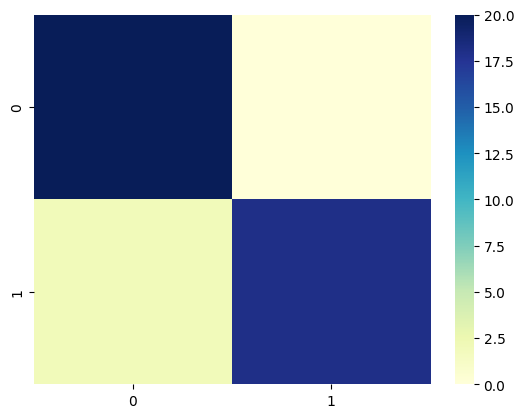

In [13]:
# columnas seleccionadas con un algoritmo de selección de características,
# en este caso fueron seleccionadas las columnas 20, 22, 28,  etc..
sel = [ 20,  22,  28,  29,  30,  47,  53,  58,  79,  92, 100, 127, 136, 139, 141, 149]

# Paso 1
# escoger columnas de X
Xsel     = X[:,sel]           # <= COMPLETAR AQUI LA SELECCION DE LAS COLUMNAS DE X
# Paso 2
# separar training / testing
# Paso 2
Xtrain,ytrain,Xtest,ytest = SplitTrainTest(Xsel,y,ntrain) # <= COMPLETAR AQUI LA FUNCION QUE SEPARA TRAINING Y TESTING

# Paso 3
# clasificar
acc_sel,Csel = ClassifierKNN(Xtrain,ytrain,Xtest,ytest)              # <= COMPLETAR AQUI LA FUNCION QUE CLASIFICA Y EVALUA DESEMPEÑO

heatmap(Csel, cmap="YlGnBu")
plt.show()

# Resultados obtenidos

In [14]:
#
# EJECUTAR ESTA CELDA SIN MODIFICARLA
#

print('P2: imagen(12,15):',imagen[12,15])
print('P3:    LBP (2,20):',Xlbp[2,20])
print('P3:    HAR (2,20):',Xhar[2,20])
print('P3:    GAB (2,20):',Xgab[2,20])
print('P4:       acc_lbp:',acc_lbp*100)
print('P5:       acc_har:',acc_har*100)
print('P6:       acc_gab:',acc_gab*100)
print('P7:       acc_all:',acc_all*100)
print('P8:       acc_sel:',acc_sel*100)


P2: imagen(12,15): 117.0
P3:    LBP (2,20): 91.0
P3:    HAR (2,20): 0.00029573916343396736
P3:    GAB (2,20): 251.0729830028847
P4:       acc_lbp: 92.5
P5:       acc_har: 92.5
P6:       acc_gab: 85.0
P7:       acc_all: 90.0
P8:       acc_sel: 95.0


# PASO FINAL: Subir tarea

<font color='orange'> **ADVERTENCIA FINAL:** Este archivo, que debe llamarse [tu NumeroID].ipynb, debe subirse a Canvas según la hora señalada para la actividad E04.
